# Test Case - Renfe data for 6th of September 2023, Corridor Madrid - Barcelona

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

from pathlib import Path

sys.path.append('..')

SAVE_PATH = Path('../reports/figures/test_case/base')
os.makedirs(SAVE_PATH, exist_ok=True)

## Simulate Passengers Demand

In [3]:
from src.robin.kernel.entities import Kernel

path_config_supply = Path('../configs/test_case/supply_data.yaml')
path_config_demand = Path('../configs/test_case/demand_data.yaml')
path_output_csv = Path('../data/test_case/output.csv')

os.makedirs(Path('../data/test_case'), exist_ok=True)
seed = 0

kernel = Kernel(path_config_supply, path_config_demand, seed)
services = kernel.simulate(output_path=path_output_csv, departure_time_hard_restriction=True)

## Plot Results

In [4]:
from src.robin.plotter.entities import KernelPlotter

kernel_plotter = KernelPlotter(
    path_output_csv=path_output_csv,
    path_config_supply=path_config_supply,
)

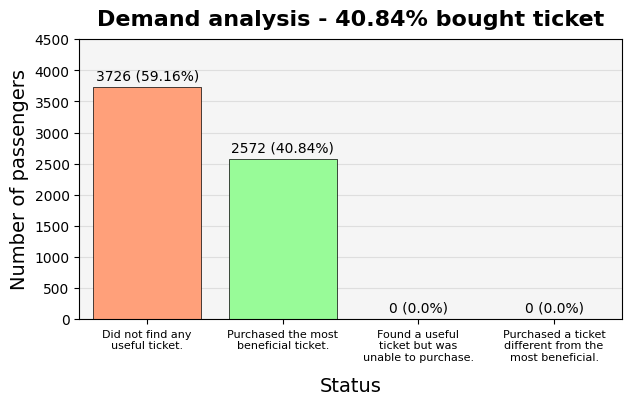

In [5]:
kernel_plotter.plot_demand_status(ylim=(0, 4500), save_path=f'{SAVE_PATH}/demand_status.pdf')

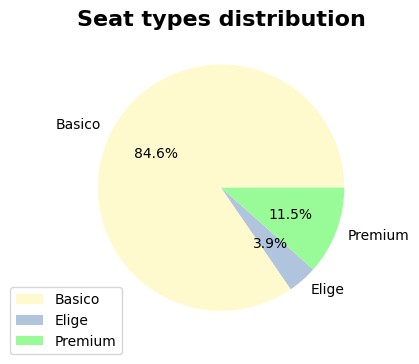

In [6]:
kernel_plotter.plot_seat_distribution(save_path=f'{SAVE_PATH}/pie.pdf')

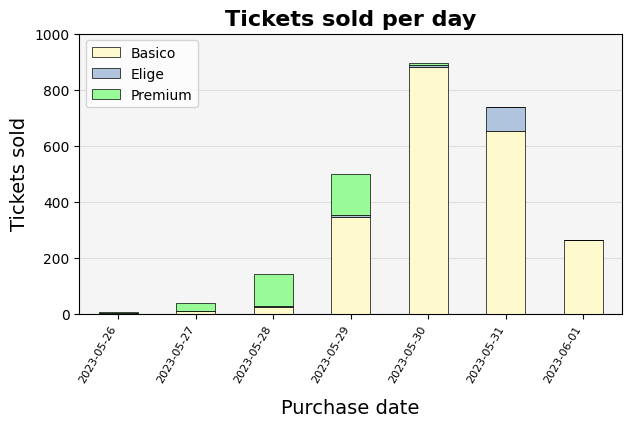

In [7]:
kernel_plotter.plot_tickets_by_date(ylim=(0, 1000), save_path=f'{SAVE_PATH}/total_tickets_sold.pdf')

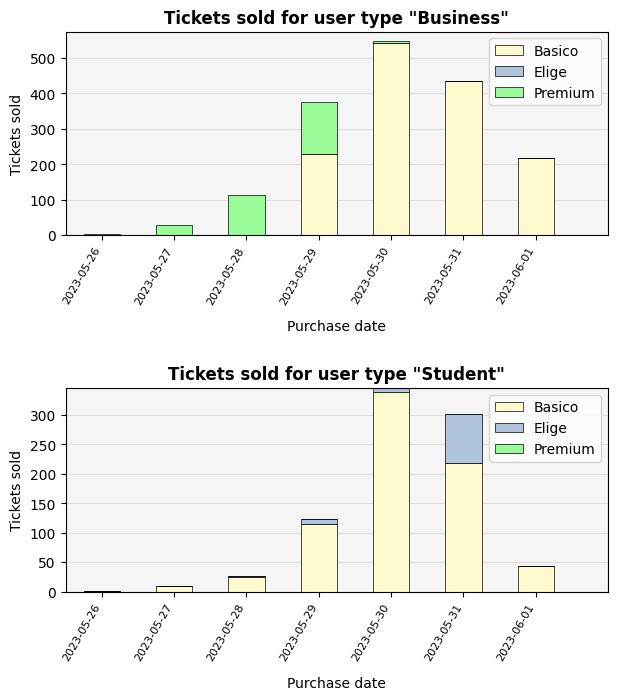

In [8]:
kernel_plotter.plot_tickets_by_user(save_path=f'{SAVE_PATH}/tickets_sold_per_usertype.pdf')

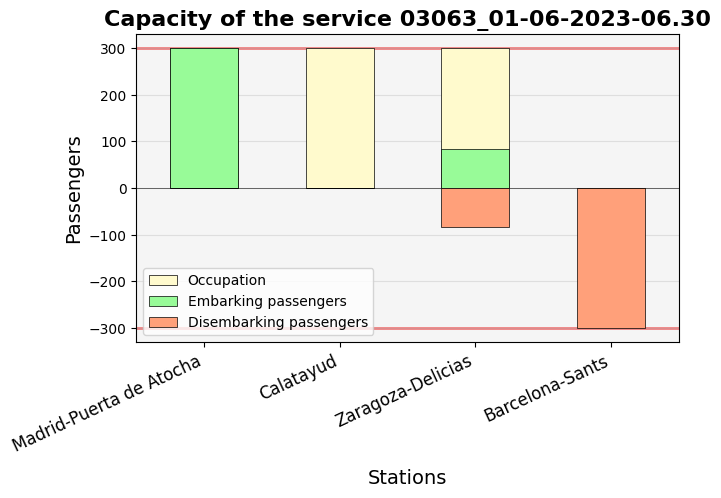

In [9]:
kernel_plotter.plot_service_capacity(
    service_id='03063_01-06-2023-06.30',
    save_path=f'{SAVE_PATH}/capacity_03063_06-09-2023-06.30.pdf'
)

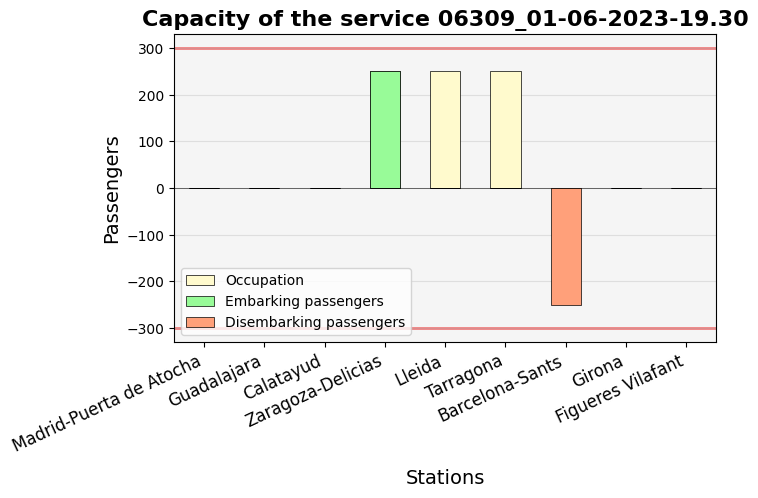

In [10]:
kernel_plotter.plot_service_capacity(
    service_id='06309_01-06-2023-19.30',
    save_path=f'{SAVE_PATH}/capacity_06309_06-09-2023-19.30.pdf'
)

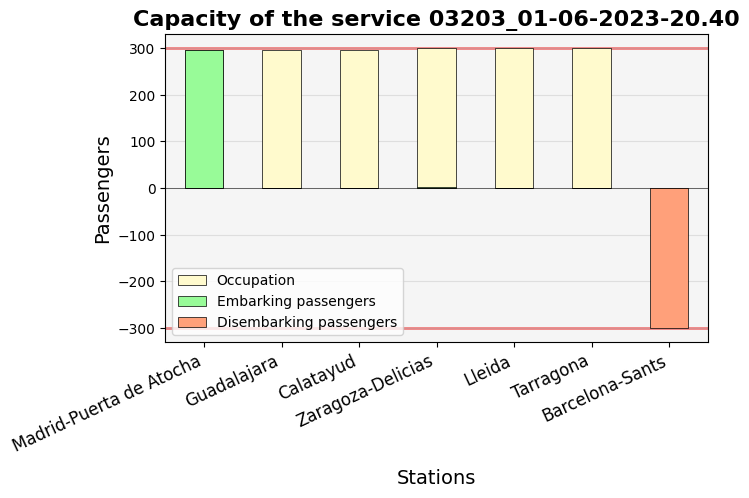

In [11]:
kernel_plotter.plot_service_capacity(
    service_id='03203_01-06-2023-20.40',
    save_path=f'{SAVE_PATH}/capacity_03203_01-06-2023-20.40.pdf'
)

[1306, 494, 375] [0. 0. 0.]
[50, 50, 0] [1306.  494.  375.]
[170, 80, 47] [1356.  544.  375.]


TypeError: can't multiply sequence by non-int of type 'float'

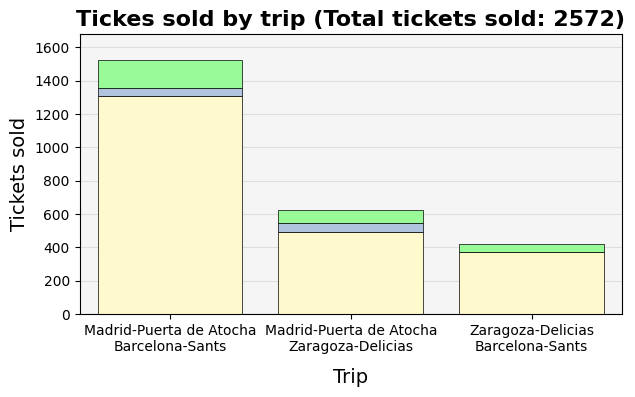

In [19]:
kernel_plotter.plot_tickets_by_trip(seat_disaggregation=True)